In [183]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

options(repr.plot.width = 13.0, repr.plot.height = 13.0)

[1] "simple-rainfall-classification-dataset"

# **Import**

In [184]:
library(dplyr)
library(ggplot2)
library(gridExtra)
library(psych)
library(ggcorrplot)

# **1. Data Import & Structure**

In [185]:
data <- read_csv('/kaggle/input/simple-rainfall-classification-dataset/rainfall.csv',show_col_types = FALSE)

In [186]:
str(data)

spc_tbl_ [54 × 6] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ date             : chr [1:54] "2022-01-01" "2022-01-02" "2022-01-03" "2022-01-04" ...
 $ rainfall         : num [1:54] 12.5 8.2 0 3.7 21.1 15.3 6.8 0 11.2 18.6 ...
 $ temperature      : num [1:54] 15.2 17.8 20.1 18.6 14.8 16.5 19.2 21.7 17.3 15.8 ...
 $ humidity         : num [1:54] 78 65 52 71 82 75 61 48 73 79 ...
 $ wind_speed       : num [1:54] 8.5 5.2 3.1 6.7 9.3 7.8 4.5 2.9 6.1 8.9 ...
 $ weather_condition: chr [1:54] "Rainy" "Rainy" "Sunny" "Rainy" ...
 - attr(*, "spec")=
  .. cols(
  ..   date = col_character(),
  ..   rainfall = col_double(),
  ..   temperature = col_double(),
  ..   humidity = col_double(),
  ..   wind_speed = col_double(),
  ..   weather_condition = col_character()
  .. )
 - attr(*, "problems")=<externalptr> 


In [187]:
describe(data)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
date*,1,54,27.500000,15.7321327,27.5,27.500000,20.01510,1.0,54.0,53.0,0.0000000,-1.2668425,2.14087210
rainfall,2,53,9.049057,6.7125205,8.3,8.776744,7.26474,0.0,21.8,21.8,0.1811981,-1.1200206,0.92203560
temperature,3,53,17.950943,2.5006632,17.8,17.825581,2.52042,13.9,23.4,9.5,0.4117016,-0.7326698,0.34349251
humidity,4,53,69.245283,11.9693610,72.0,69.976744,10.37820,44.0,89.0,45.0,-0.5332024,-0.7948024,1.64411817
wind_speed,5,53,6.403774,2.2090689,6.7,6.455814,2.66868,2.1,10.5,8.4,-0.1957406,-1.0806282,0.30343895
weather_condition*,6,53,1.207547,0.4094316,1.0,1.139535,0.00000,1.0,2.0,1.0,1.4016253,-0.0350466,0.05623976


In [188]:
summary(data)

     date              rainfall       temperature       humidity    
 Length:54          Min.   : 0.000   Min.   :13.90   Min.   :44.00  
 Class :character   1st Qu.: 3.900   1st Qu.:16.10   1st Qu.:62.00  
 Mode  :character   Median : 8.300   Median :17.80   Median :72.00  
                    Mean   : 9.049   Mean   :17.95   Mean   :69.25  
                    3rd Qu.:14.800   3rd Qu.:19.40   3rd Qu.:78.00  
                    Max.   :21.800   Max.   :23.40   Max.   :89.00  
                    NA's   :1        NA's   :1       NA's   :1      
   wind_speed     weather_condition 
 Min.   : 2.100   Length:54         
 1st Qu.: 4.700   Class :character  
 Median : 6.700   Mode  :character  
 Mean   : 6.404                     
 3rd Qu.: 8.300                     
 Max.   :10.500                     
 NA's   :1                          

**Check missing value**

In [189]:
colSums(is.na(data))

date          rainfall       temperature          humidity 
                0                 1                 1                 1 
       wind_speed weather_condition 
                1                 1

**duplicate check**

In [190]:
sum(duplicated(data))

[1] 0

# **2. Data Transform**

In [191]:
data <- na.omit(data)

In [192]:
data$date <- as.Date(data$date)

**Data Check**

In [193]:
head(data)

date,rainfall,temperature,humidity,wind_speed,weather_condition
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2022-01-01,12.5,15.2,78,8.5,Rainy
2022-01-02,8.2,17.8,65,5.2,Rainy
2022-01-03,0.0,20.1,52,3.1,Sunny
2022-01-04,3.7,18.6,71,6.7,Rainy
2022-01-05,21.1,14.8,82,9.3,Rainy
2022-01-06,15.3,16.5,75,7.8,Rainy


# **3. Data Visualization**

**Histogram**

In [194]:
p1 <- ggplot(data, aes(x= rainfall)) + 
    geom_histogram(fill = 'skyblue',bins = 30, col = 'white') + 
    theme_bw() +
    ggtitle('rainfall Histogram') + 
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

p2 <-ggplot(data, aes(x= temperature)) + 
    geom_histogram(fill = 'blue',bins = 30 , col = 'white') + 
    theme_bw() +
    ggtitle('temperature Histogram') + 
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

p3 <-ggplot(data, aes(x= humidity)) + geom_histogram(fill = 'orange',bins = 30, col = 'white') +
    theme_bw() +
    ggtitle('humidity Histogram') + 
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

p4 <-ggplot(data, aes(x= wind_speed)) + geom_histogram(fill = 'green',bins = 30, col = 'white' ) + 
    theme_bw() +
    ggtitle('wind_speed Histogram') + 
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

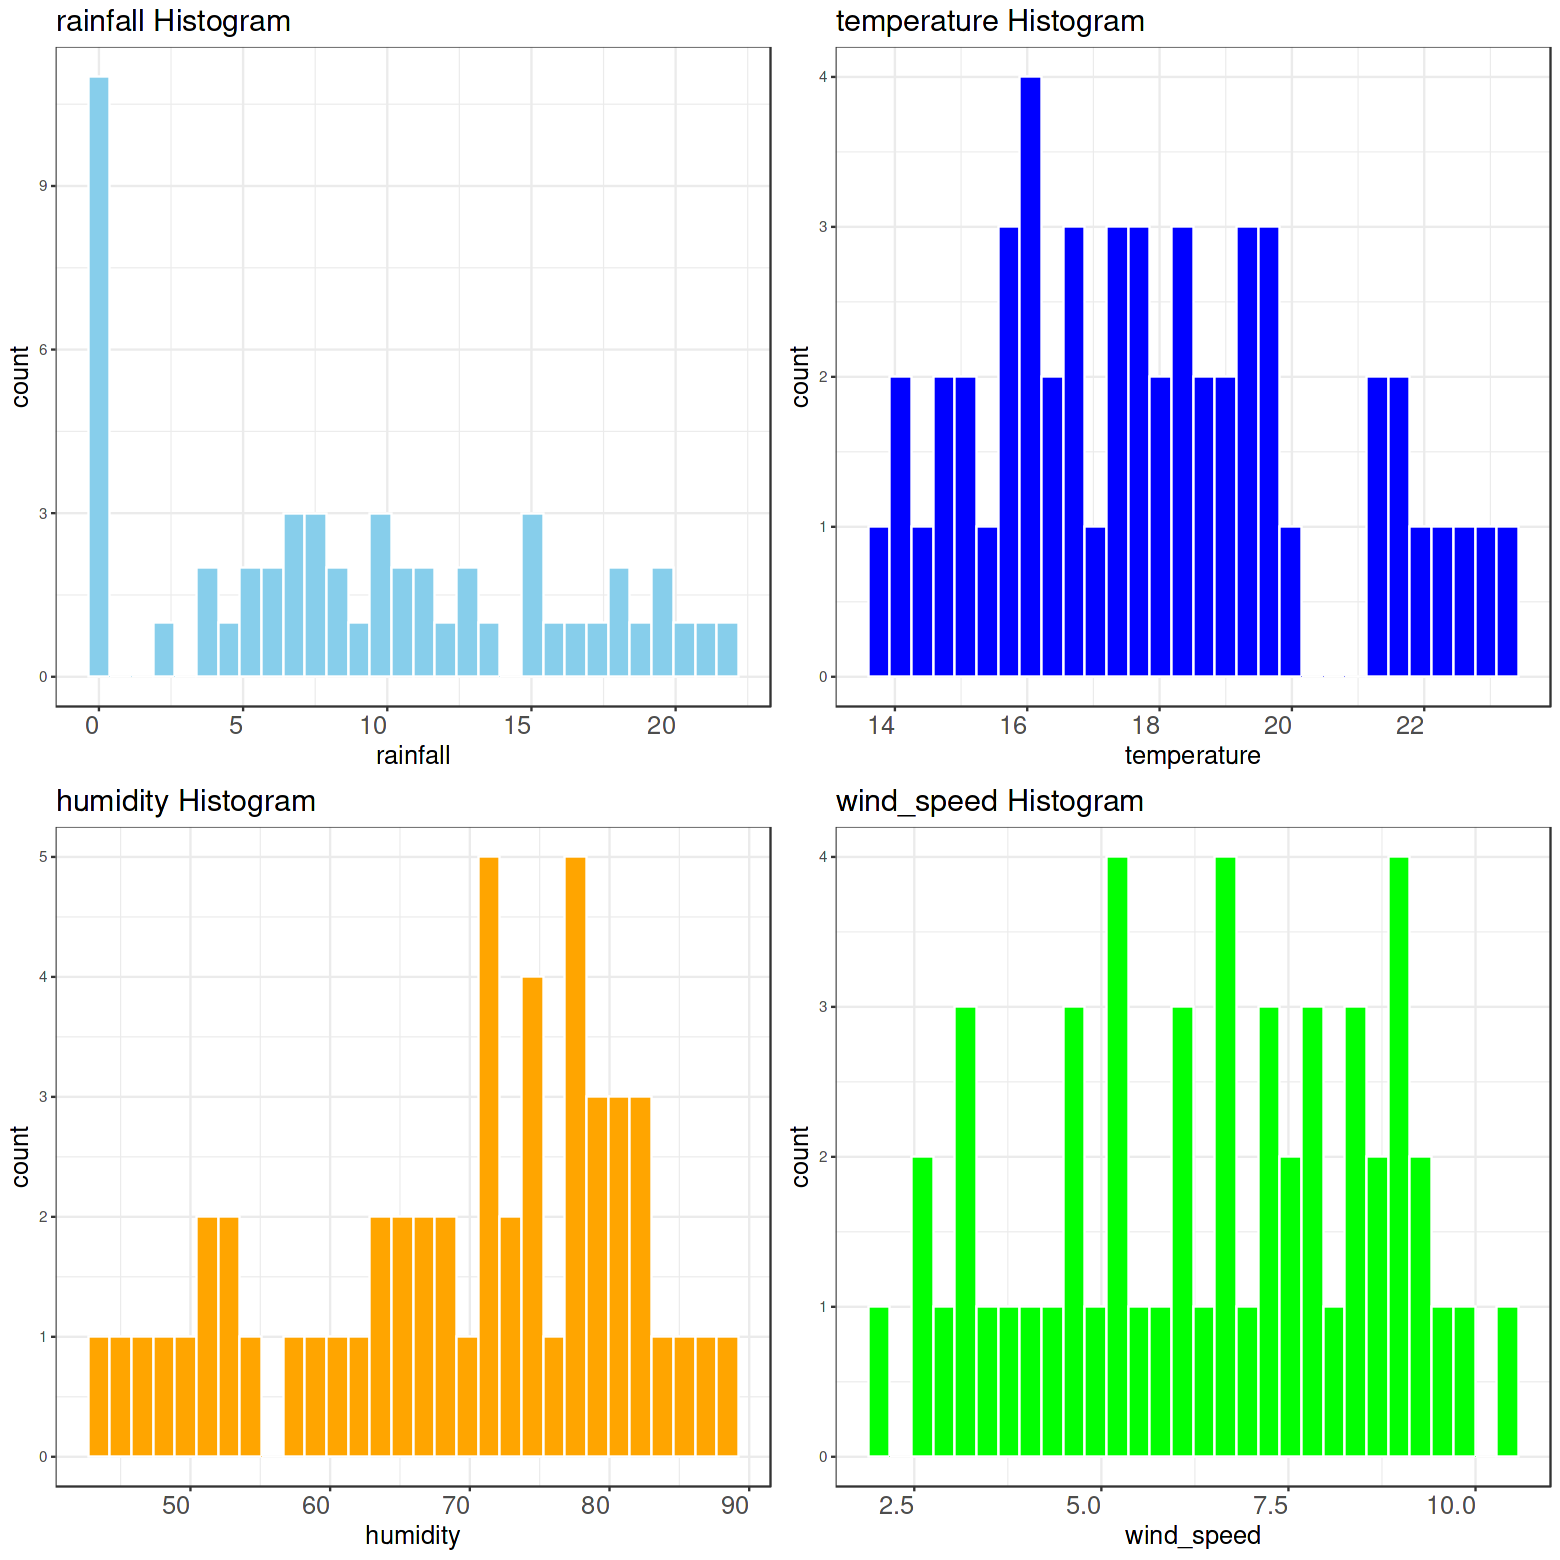

In [195]:
grid.arrange(p1,p2,p3,p4, ncol = 2)

**Barplot**

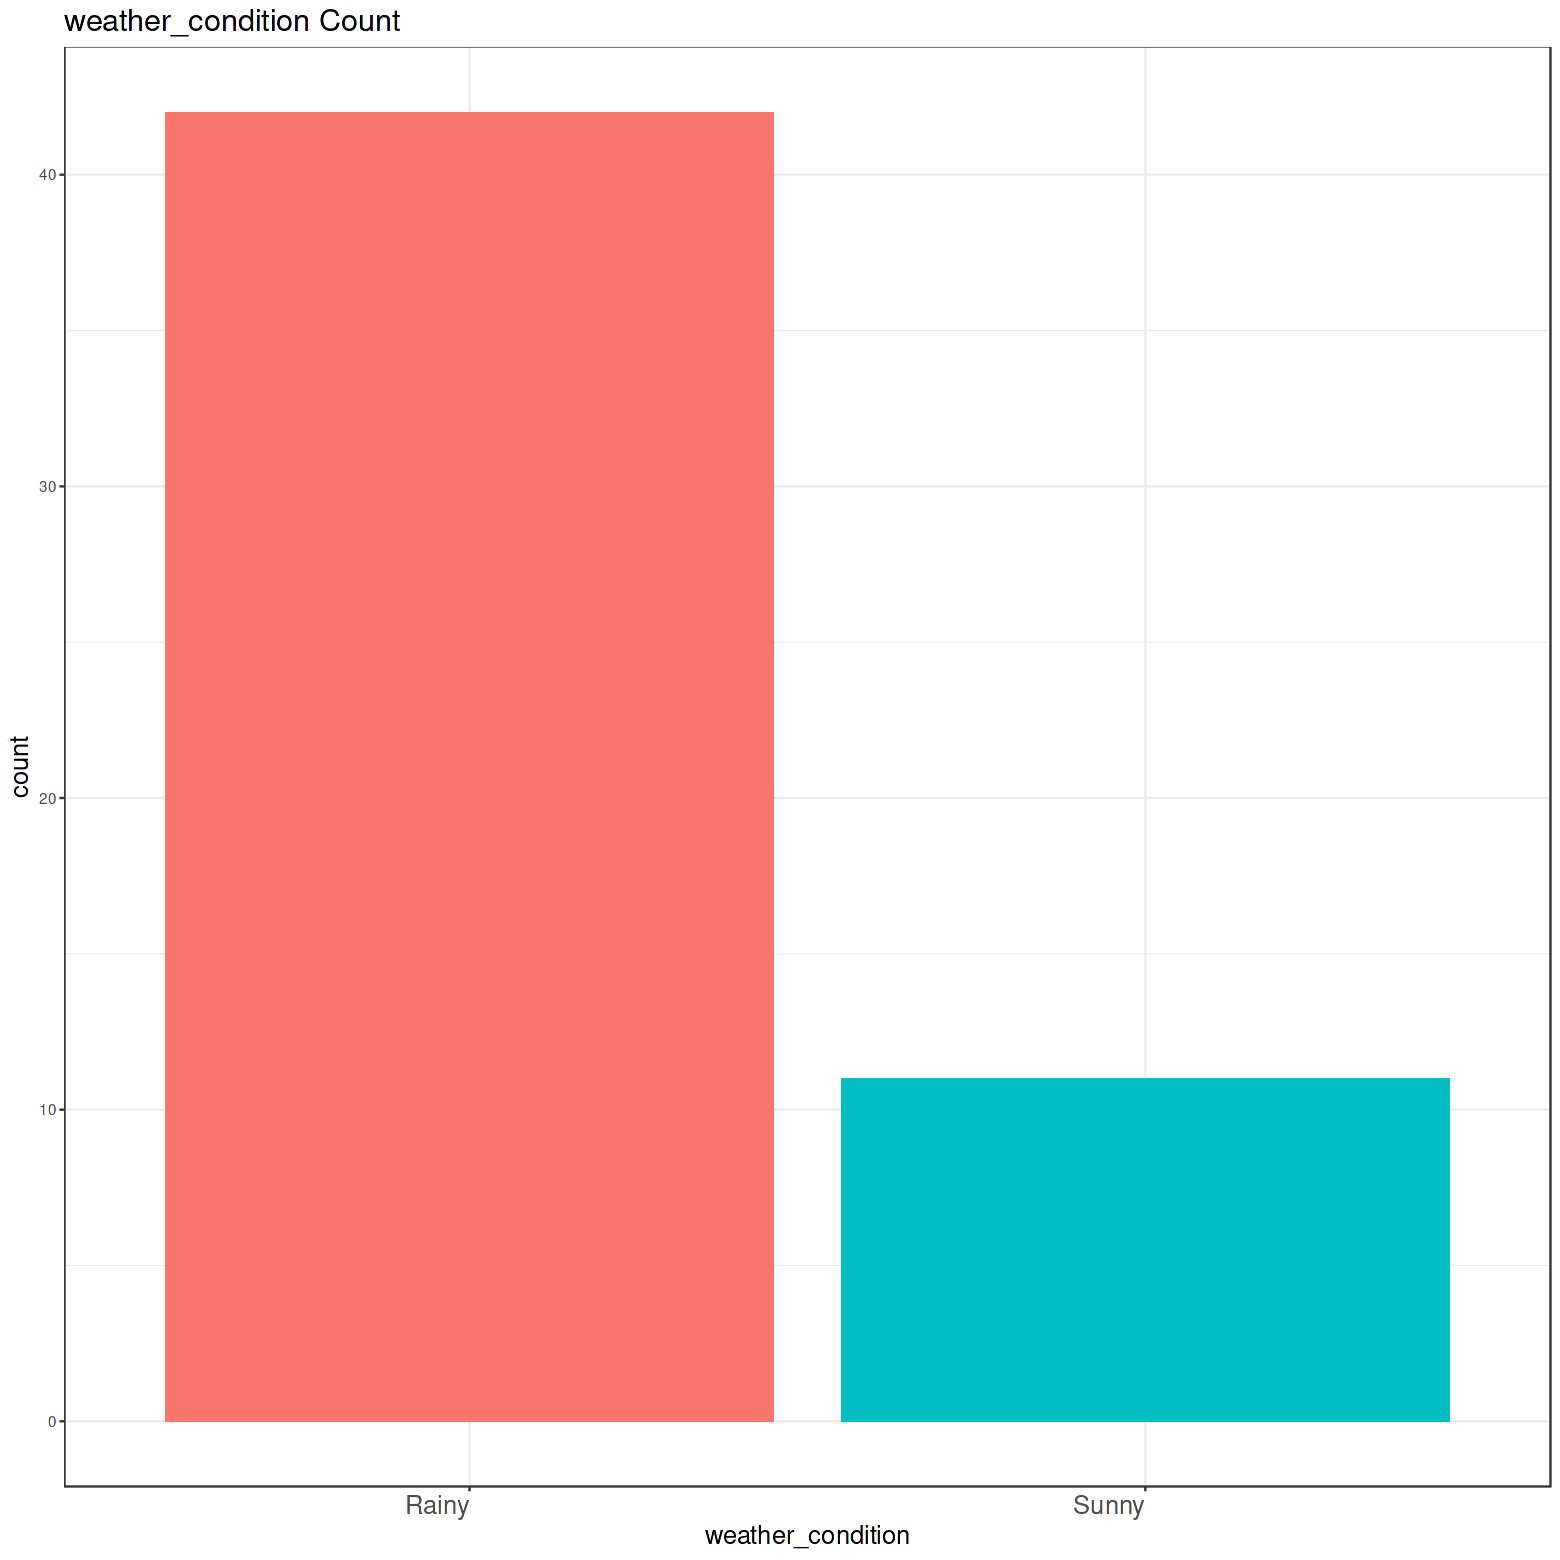

In [196]:
ggplot(data) + 
    geom_bar(aes(x=weather_condition , fill = weather_condition)) +   
    theme_bw() +
    ggtitle('weather_condition Count') + 
    theme(
    legend.position = 'none',
    axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

**Change by date**

In [197]:
p1 <- ggplot(data, aes(x=date, y= rainfall, color = weather_condition )) + geom_line() + ggtitle('Change in \'rainfall\' by year') +    
    theme_bw() +
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

p2 <- ggplot(data, aes(x=date, y= temperature , color = weather_condition )) + geom_line() + ggtitle('Change in \'temperature\' by year') + 
    theme_bw() +
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

p3 <- ggplot(data, aes(x=date, y= humidity, color = weather_condition )) + geom_line() + ggtitle('Change in \'humidity\' by year') + 
    theme_bw() +
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

p4 <- ggplot(data, aes(x=date, y= wind_speed , color = weather_condition )) + geom_line() + ggtitle('Change in \'wind_speed\' by year') + 
    theme_bw() +    
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )


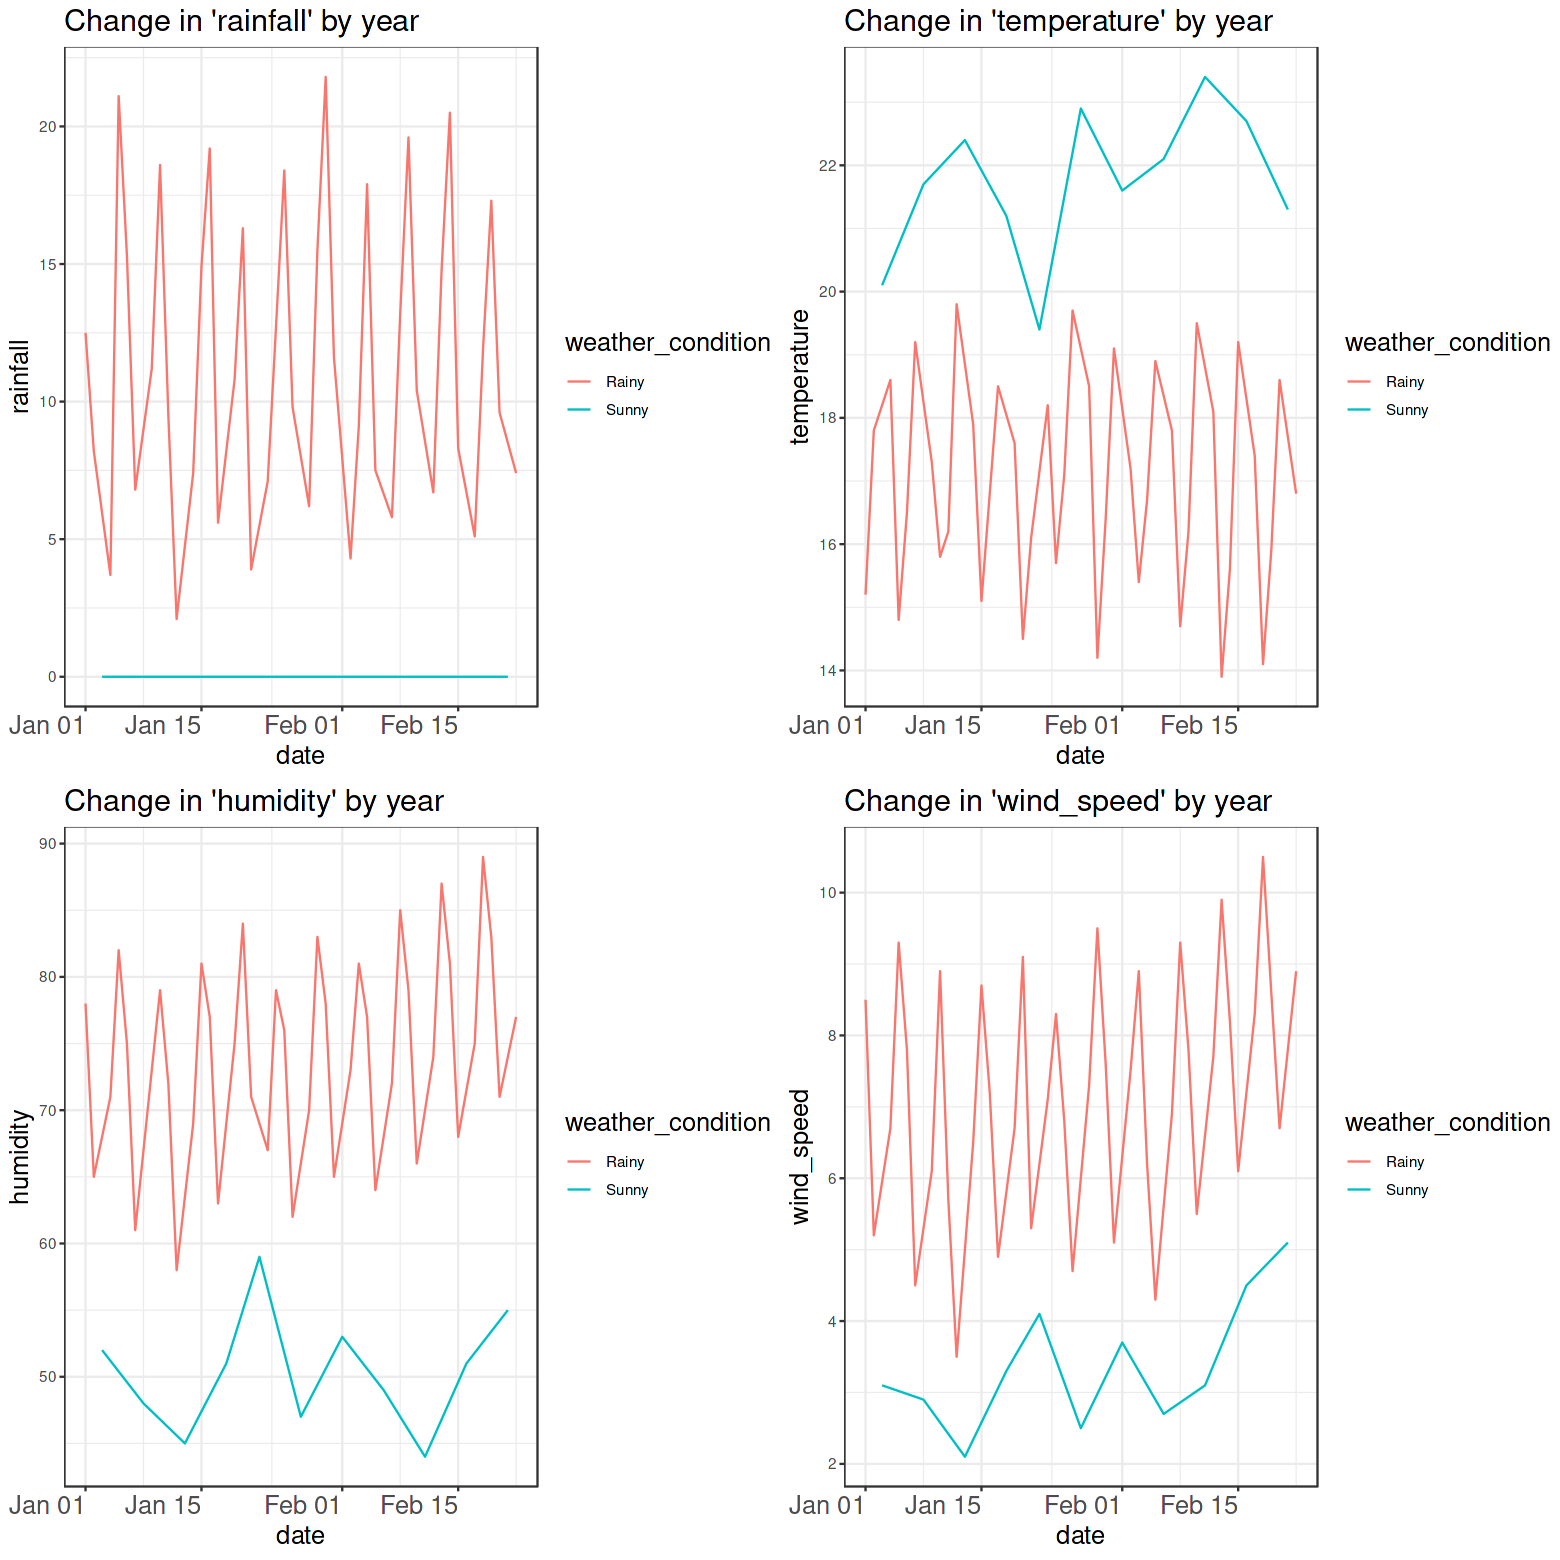

In [198]:
grid.arrange(p1,p2,p3,p4, ncol = 2)

**Correlation**

In [199]:
num_cols <- c('rainfall','temperature','humidity','wind_speed')

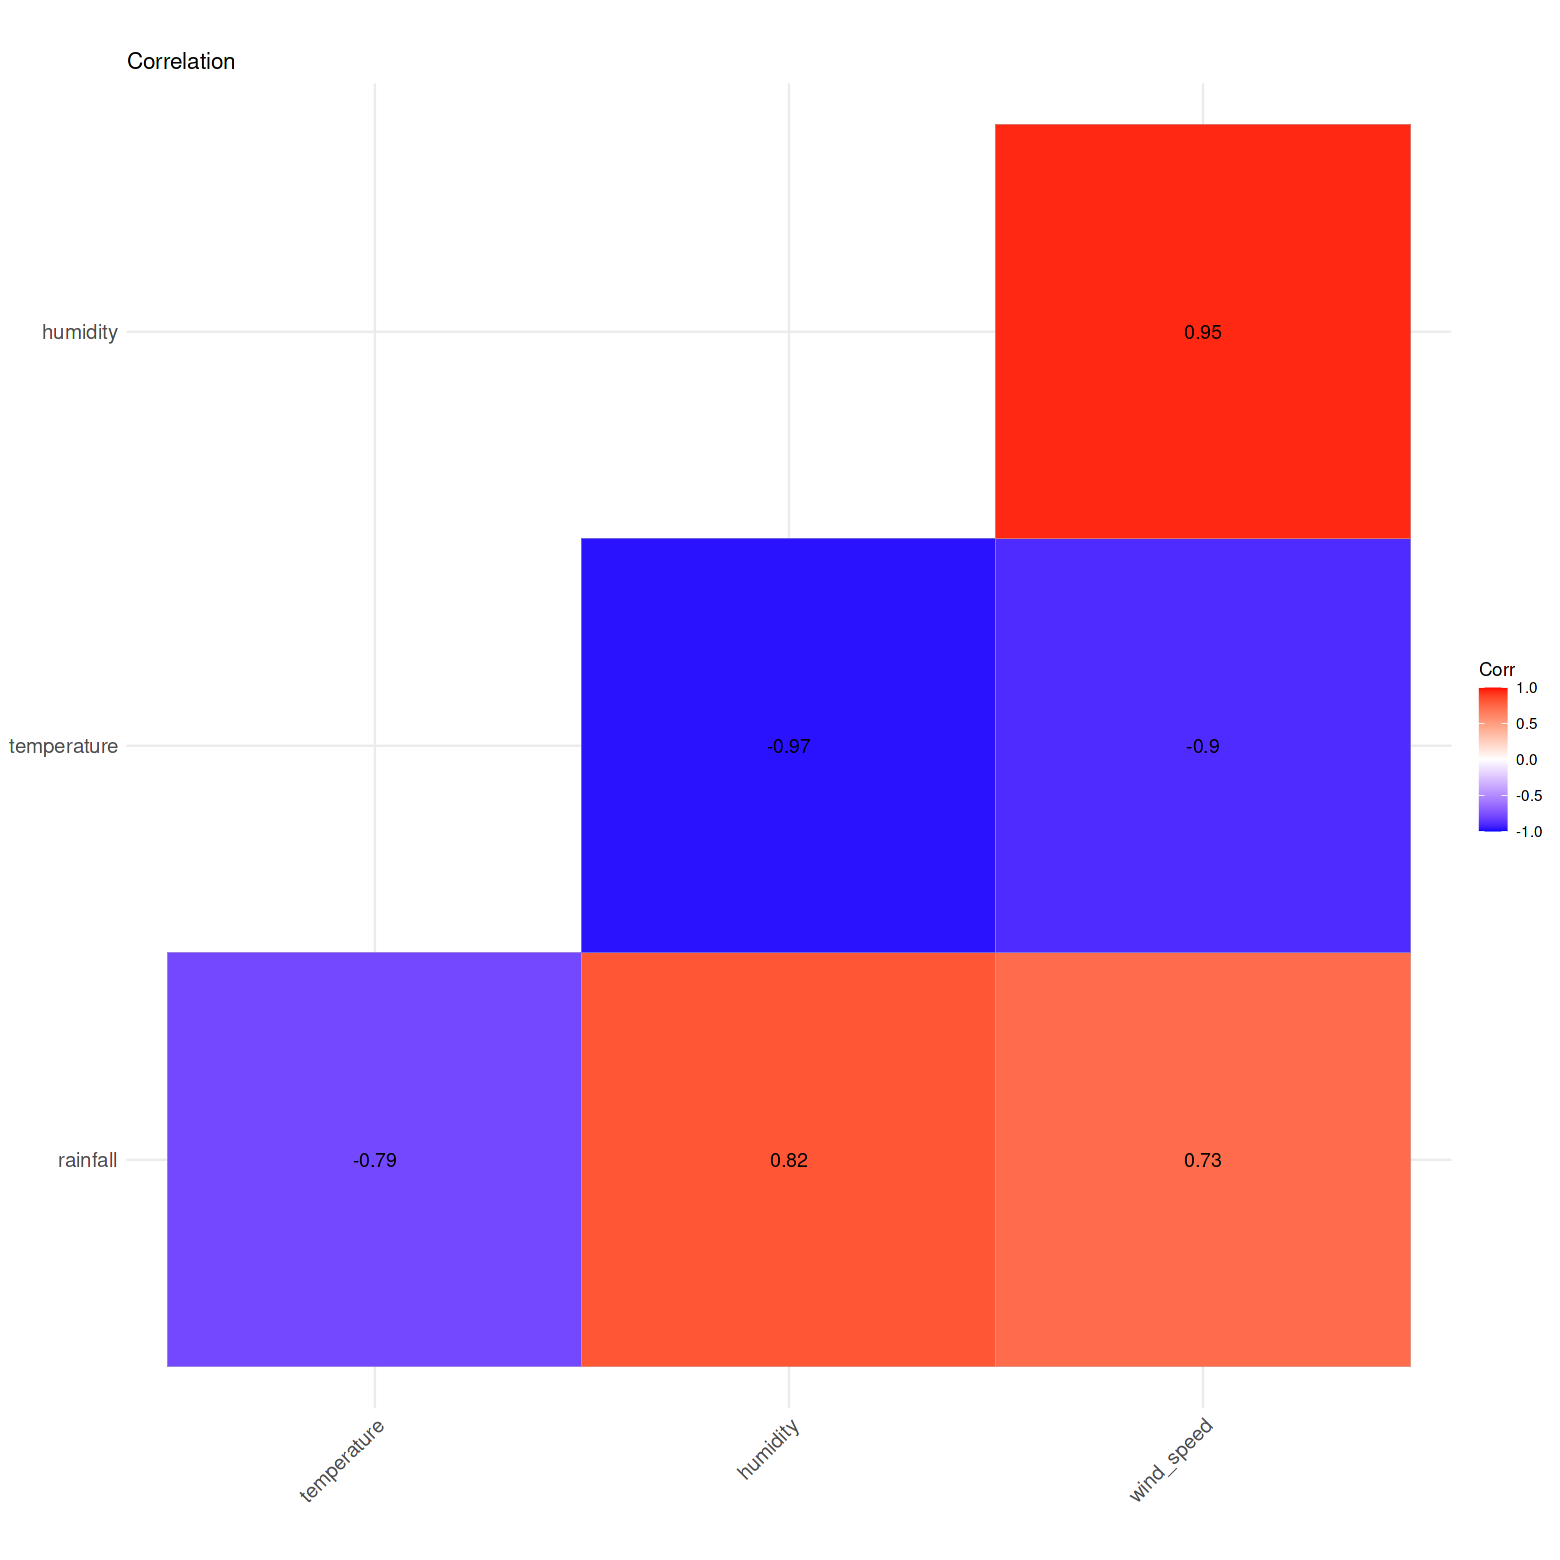

In [200]:
ggcorrplot(cor(data[,num_cols]) , type = "lower", lab=T, title = 'Correlation')

# **4. Modeling**

In [201]:
data$weather_condition <- ifelse(data$weather_condition == 'Rainy', 1 , 
                                ifelse(data$weather_condition == 'Sunny',0,2))

data$weather_condition <- as.factor(data$weather_condition)

In [202]:
data <- data[,-1]

In [203]:
library(randomForest)
library(Metrics)
library(caret)

**Logistic Regression**

In [204]:
LR <- glm(weather_condition ~., data, family = 'binomial')

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


In [205]:
summary(LR)


Call:
glm(formula = weather_condition ~ ., family = "binomial", data = data)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-3.852e-05   2.100e-08   2.100e-08   2.100e-08   4.187e-05  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)
(Intercept)   -1015.02 2154908.94   0.000    1.000
rainfall         11.33    9592.98   0.001    0.999
temperature      23.48   60527.97   0.000    1.000
humidity         11.46   18504.44   0.001    1.000
wind_speed      -33.58   32796.14  -0.001    0.999

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 5.4133e+01  on 52  degrees of freedom
Residual deviance: 4.4124e-09  on 48  degrees of freedom
AIC: 10

Number of Fisher Scoring iterations: 25


In [206]:
pred_LR <- round(predict(LR,data,type = "response"))

In [207]:
confusionMatrix(factor(pred_LR), reference = data$weather_condition)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 11  0
         1  0 42
                                     
               Accuracy : 1          
                 95% CI : (0.9328, 1)
    No Information Rate : 0.7925     
    P-Value [Acc > NIR] : 4.422e-06  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.2075     
         Detection Rate : 0.2075     
   Detection Prevalence : 0.2075     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : 0          
                                     

In [211]:
accuracy_LR <- confusionMatrix(factor(pred_LR), reference = data$weather_condition)$overall[1]
accuracy_LR

Accuracy 
       1

-----------

**RandomForest**

In [212]:
RF <-  randomForest(weather_condition ~., data = data, ntree=300)

In [213]:
pred_rf <- predict(RF,data)

In [214]:
confusionMatrix(pred_rf, reference = data$weather_condition)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 11  0
         1  0 42
                                     
               Accuracy : 1          
                 95% CI : (0.9328, 1)
    No Information Rate : 0.7925     
    P-Value [Acc > NIR] : 4.422e-06  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.2075     
         Detection Rate : 0.2075     
   Detection Prevalence : 0.2075     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : 0          
                                     

--------

**Please leave your advice in the comments. Thank you**